In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Preprocessing

In [3]:
# Shape
heart.shape

(1025, 14)

In [4]:
# Summary
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Unique values of categorical variables
cat = ['target','sex','cp','fbs','restecg','exang','slope','ca','thal']
for i in cat:
  print(i, ":", heart[i].unique())

target : [0 1]
sex : [1 0]
cp : [0 1 2 3]
fbs : [0 1]
restecg : [1 0 2]
exang : [0 1]
slope : [2 0 1]
ca : [2 0 1 3 4]
thal : [3 2 1 0]


In [6]:
# Value counts of some categorical variables
cat1 = ['slope','ca','thal']
for i in cat1:
  print(i, ":", "\n", heart[i].value_counts(), "\n")

slope : 
 1    482
2    469
0     74
Name: slope, dtype: int64 

ca : 
 0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64 

thal : 
 2    544
3    410
1     64
0      7
Name: thal, dtype: int64 



Performing one-hot encoding on categorical columns with non-binary values to convert them into binary.


In [7]:
# One-Hot Encoding
heart_encoded = pd.get_dummies(heart, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [8]:
heart_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Dropping 'thal_3' and 'ca_4' columns because we don't have any explanations for these values on kaggle's site so we have no clue what these values indicate.

In [9]:
heart_encoded.drop(['thal_3','ca_4'], axis=1, inplace=True)

Scaling continuous columns

In [10]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Instantiate and fit scaler
sc = StandardScaler()
heart_encoded[['age','trestbps','chol','thalach','oldpeak']] = sc.fit_transform(heart_encoded[['age','trestbps','chol','thalach','oldpeak']])

In [11]:
heart_encoded.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1


## Exploratory Data Analysis

<Axes: >

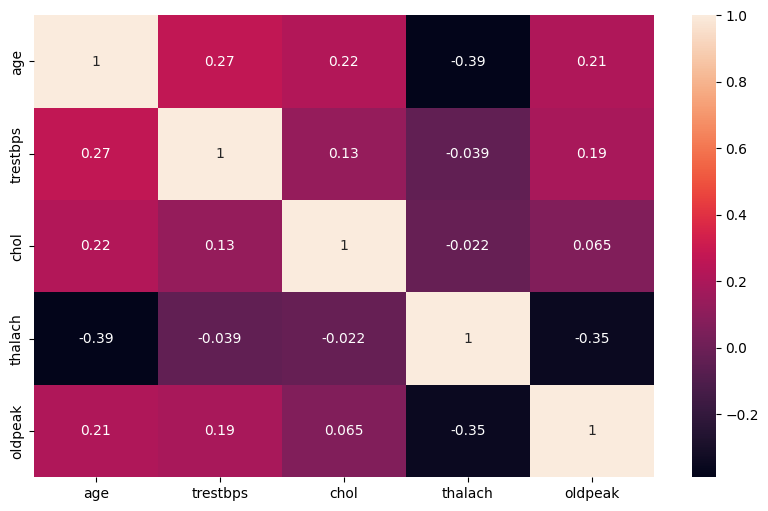

In [12]:
# Correlation
cont = heart_encoded[['age','trestbps','chol','thalach','oldpeak']]
plt.figure(figsize=(10,6))
sns.heatmap(cont.corr(),annot = True)

<ipython-input-13-c4c117776bbf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_encoded["age"])


<Axes: xlabel='age', ylabel='Density'>

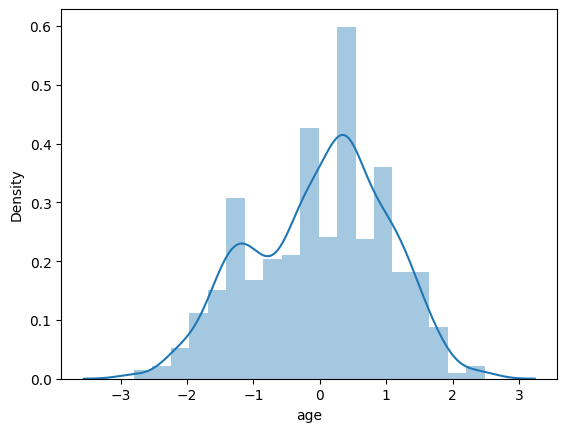

In [13]:
# Distribution of data
sns.distplot(heart_encoded["age"])

<ipython-input-14-8464a5115a8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_encoded["trestbps"])


<Axes: xlabel='trestbps', ylabel='Density'>

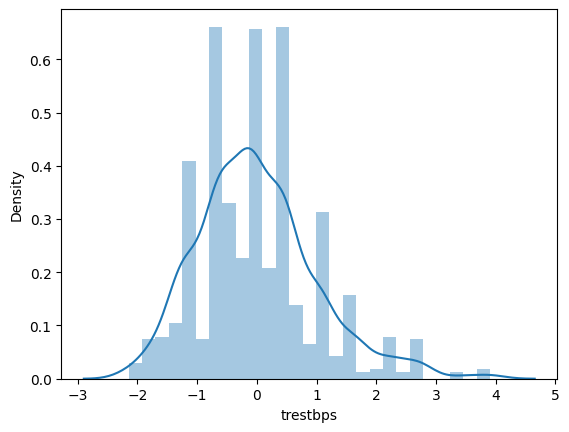

In [14]:
sns.distplot(heart_encoded["trestbps"])

## Model Implementation and Evaluation

In [15]:
# Import required models and metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , roc_auc_score , precision_score, accuracy_score, recall_score, f1_score
from sklearn import tree

In [16]:
# Creating dependent and independent variables
x = heart_encoded.drop("target", axis=1).copy()
y = heart_encoded['target'].copy()

In [17]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123)

#### K-Nearest Neighbor

In [18]:
# Instantiate and fit KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

##### Evaluation of KNN

In [19]:
# Predictions on test and train data using knn
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

In [20]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n", classification_report(y_test, y_pred), "\n")

Accuracy score: 0.8390243902439024 

Precision score: 0.8434343434343434 

Recall score: 0.8267326732673267 

F1 score: 0.835 

ROC AUC score: 0.8388471058644326 

Confusion Matrix: 
 [[177  31]
 [ 35 167]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       208
           1       0.84      0.83      0.83       202

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410
 



In [21]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n",classification_report(y_train, y_pred_train), "\n")

Accuracy score: 0.8699186991869918 

Precision score: 0.8788819875776398 

Recall score: 0.8734567901234568 

F1 score: 0.8761609907120743 

ROC AUC score: 0.869718085783378 

Confusion Matrix: 
 [[252  39]
 [ 41 283]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       291
           1       0.88      0.87      0.88       324

    accuracy                           0.87       615
   macro avg       0.87      0.87      0.87       615
weighted avg       0.87      0.87      0.87       615
 



#### Naive Bayes

In [22]:
# Instantiate and fit naive bayes
Naive_bayes = GaussianNB()
Naive_bayes.fit(x_train, y_train)

GaussianNB()

##### Evaluation of Naive Bayes

In [23]:
# Predictions on test and train data using naive bayes
y_pred = Naive_bayes.predict(x_test)
y_pred_train = Naive_bayes.predict(x_train)

In [24]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n",confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n",classification_report(y_test, y_pred), "\n")

Accuracy score: 0.8292682926829268 

Precision score: 0.8084112149532711 

Recall score: 0.8564356435643564 

F1 score: 0.8317307692307692 

ROC AUC score: 0.8296601294744859 

Confusion Matrix: 
 [[167  41]
 [ 29 173]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       208
           1       0.81      0.86      0.83       202

    accuracy                           0.83       410
   macro avg       0.83      0.83      0.83       410
weighted avg       0.83      0.83      0.83       410
 



In [25]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n", classification_report(y_train, y_pred_train), "\n")

Accuracy score: 0.8276422764227642 

Precision score: 0.8224852071005917 

Recall score: 0.8580246913580247 

F1 score: 0.8398791540785498 

ROC AUC score: 0.8259195621738579 

Confusion Matrix: 
 [[231  60]
 [ 46 278]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       291
           1       0.82      0.86      0.84       324

    accuracy                           0.83       615
   macro avg       0.83      0.83      0.83       615
weighted avg       0.83      0.83      0.83       615
 



#### Decision Tree Classifier

In [26]:
# Instantiate and fit decision tree
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[27] <= 0.5\ngini = 0.499\nsamples = 615\nvalue = [291, 324]'),
 Text(0.25, 0.5, 'x[7] <= 0.5\ngini = 0.359\nsamples = 282\nvalue = [216, 66]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 97\nvalue = [49, 48]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.176\nsamples = 185\nvalue = [167, 18]'),
 Text(0.75, 0.5, 'x[21] <= 0.5\ngini = 0.349\nsamples = 333\nvalue = [75, 258]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 98\nvalue = [49, 49]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.197\nsamples = 235\nvalue = [26, 209]')]

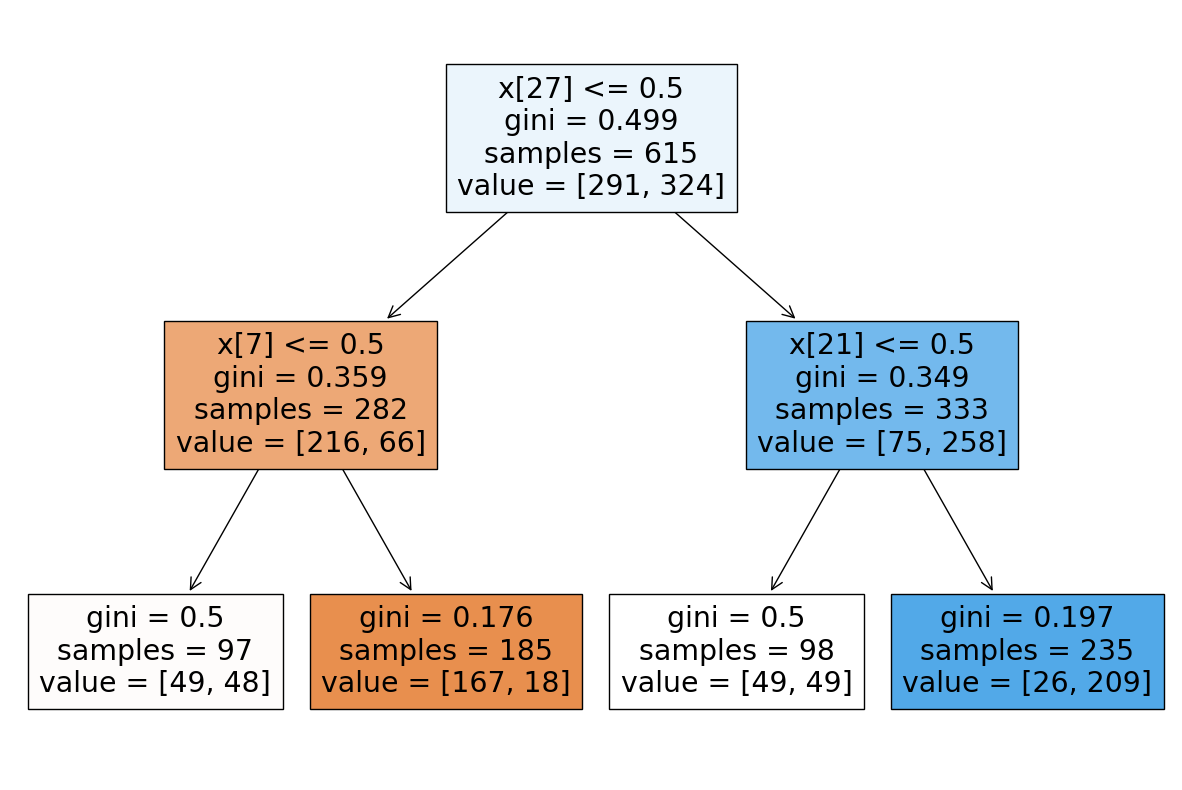

In [27]:
# Plotting decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled = True)

##### Evaluation of Decision tree

In [28]:
# Predictions on test and train data using decision tree
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

In [29]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n", classification_report(y_test, y_pred), "\n")

Accuracy score: 0.748780487804878 

Precision score: 0.8778625954198473 

Recall score: 0.5693069306930693 

F1 score: 0.6906906906906908 

ROC AUC score: 0.7461919268849962 

Confusion Matrix: 
 [[192  16]
 [ 87 115]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       208
           1       0.88      0.57      0.69       202

    accuracy                           0.75       410
   macro avg       0.78      0.75      0.74       410
weighted avg       0.78      0.75      0.74       410
 



In [30]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n", classification_report(y_train, y_pred_train), "\n")

Accuracy score: 0.7707317073170732 

Precision score: 0.8893617021276595 

Recall score: 0.6450617283950617 

F1 score: 0.7477638640429338 

ROC AUC score: 0.7778573246786306 

Confusion Matrix: 
 [[265  26]
 [115 209]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       291
           1       0.89      0.65      0.75       324

    accuracy                           0.77       615
   macro avg       0.79      0.78      0.77       615
weighted avg       0.80      0.77      0.77       615
 



## Cross Validation

In [31]:
from sklearn.model_selection import GridSearchCV

#### KNN with CV

In [32]:
# Defining parameters
parameters={'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']}

In [33]:
# Instantiate and fit grid Search cv
GD = GridSearchCV(KNeighborsClassifier(),parameters,cv=10)
GD.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [34]:
# Best parameters
GD.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

##### Evaluation of KNN with cv

In [35]:
# Predictions on test and train data using knn
y_pred = GD.predict(x_test)
y_pred_train = GD.predict(x_train)

In [36]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n", classification_report(y_test, y_pred), "\n")

Accuracy score: 0.9707317073170731 

Precision score: 0.9846938775510204 

Recall score: 0.9554455445544554 

F1 score: 0.9698492462311558 

ROC AUC score: 0.9705112338156893 

Confusion Matrix: 
 [[205   3]
 [  9 193]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       208
           1       0.98      0.96      0.97       202

    accuracy                           0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410
 



In [37]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n", classification_report(y_train, y_pred_train), "\n")

Accuracy score: 1.0 

Precision score: 1.0 

Recall score: 1.0 

F1 score: 1.0 

ROC AUC score: 1.0 

Confusion Matrix: 
 [[291   0]
 [  0 324]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       324

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615
 



#### Naive Bayes with CV

In [38]:
params = {'var_smoothing': np.logspace(0, -10, num=100)}

In [39]:
#Instantiate and fit Naive bayes with CV
Naive_bayes = GaussianNB()
Naive_bayesCV = GridSearchCV(Naive_bayes, param_grid=params, cv=10, scoring='accuracy')
Naive_bayesCV.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 7.92482898e-01, 6.28029144e-01, 4.97702356e-01,
       3.94420606e-01, 3.12571585e-01, 2.47707636e-01, 1.96304065e-01,
       1.55567614e-01, 1.23284674e-01, 9.77009957e-02, 7.74263683e-02,
       6.13590727e-02, 4.86260158e-02, 3.85352859e-02, 3.05385551e-02,
       2.42012826e-02, 1.91791026e-02, 1.5...
       2.10490414e-08, 1.66810054e-08, 1.32194115e-08, 1.04761575e-08,
       8.30217568e-09, 6.57933225e-09, 5.21400829e-09, 4.13201240e-09,
       3.27454916e-09, 2.59502421e-09, 2.05651231e-09, 1.62975083e-09,
       1.29154967e-09, 1.02353102e-09, 8.11130831e-10, 6.42807312e-10,
       5.09413801e-10, 4.03701726e-10, 3.19926714e-10, 2.53536449e-10,
       2.00923300e-10, 1.59228279e-10, 1.26185688e-10, 1.00000000e-10])},
             scoring='accuracy')

##### Evaluation of Naive Bayes with CV

In [40]:
# Predictions on test and train data using naive bayes cv
y_pred = Naive_bayesCV.predict(x_test)
y_pred_train = Naive_bayesCV.predict(x_train)

In [41]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n", classification_report(y_test, y_pred), "\n")

Accuracy score: 0.8365853658536585 

Precision score: 0.8 

Recall score: 0.8910891089108911 

F1 score: 0.8430913348946136 

ROC AUC score: 0.8373714775323686 

Confusion Matrix: 
 [[163  45]
 [ 22 180]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       208
           1       0.80      0.89      0.84       202

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410
 



In [42]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n", classification_report(y_train, y_pred_train), "\n")

Accuracy score: 0.8471544715447155 

Precision score: 0.8230337078651685 

Recall score: 0.904320987654321 

F1 score: 0.8617647058823529 

ROC AUC score: 0.8439130711467482 

Confusion Matrix: 
 [[228  63]
 [ 31 293]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       291
           1       0.82      0.90      0.86       324

    accuracy                           0.85       615
   macro avg       0.85      0.84      0.85       615
weighted avg       0.85      0.85      0.85       615
 



#### Decision Tree Classifier with CV

In [43]:
params = {'criterion':['gini','entropy','log_loss'], 'splitter':['best','random'], 'max_depth':[3,4,5], 'max_features':['auto','sqrt','log2']}

In [44]:
# Instantiate and fit decision tree
dt = DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, param_grid=params, cv=10, scoring='accuracy')
dt_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

##### Evaluation of Decision tree CV

In [45]:
# Predictions on test and train data using decision tree CV
y_pred = dt_cv.predict(x_test)
y_pred_train = dt_cv.predict(x_train)

In [46]:
# Test Evaluation
print("Accuracy score:", accuracy_score(y_test, y_pred), "\n")
print("Precision score:", precision_score(y_test, y_pred), "\n")
print("Recall score:", recall_score(y_test, y_pred), "\n")
print("F1 score:", f1_score(y_test, y_pred), "\n")
print("ROC AUC score:", roc_auc_score(y_test, y_pred), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_test, y_pred), "\n")
print("Classification Report:", "\n", classification_report(y_test, y_pred), "\n")

Accuracy score: 0.8560975609756097 

Precision score: 0.8522167487684729 

Recall score: 0.8564356435643564 

F1 score: 0.854320987654321 

ROC AUC score: 0.8561024371667936 

Confusion Matrix: 
 [[178  30]
 [ 29 173]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       208
           1       0.85      0.86      0.85       202

    accuracy                           0.86       410
   macro avg       0.86      0.86      0.86       410
weighted avg       0.86      0.86      0.86       410
 



In [47]:
# Train Evaluation
print("Accuracy score:", accuracy_score(y_train, y_pred_train), "\n")
print("Precision score:", precision_score(y_train, y_pred_train), "\n")
print("Recall score:", recall_score(y_train, y_pred_train), "\n")
print("F1 score:", f1_score(y_train, y_pred_train), "\n")
print("ROC AUC score:", roc_auc_score(y_train, y_pred_train), "\n")
print("Confusion Matrix:", "\n", confusion_matrix(y_train, y_pred_train), "\n")
print("Classification Report:", "\n", classification_report(y_train, y_pred_train), "\n")

Accuracy score: 0.8926829268292683 

Precision score: 0.910828025477707 

Recall score: 0.8827160493827161 

F1 score: 0.8965517241379312 

ROC AUC score: 0.8932480590556192 

Confusion Matrix: 
 [[263  28]
 [ 38 286]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       291
           1       0.91      0.88      0.90       324

    accuracy                           0.89       615
   macro avg       0.89      0.89      0.89       615
weighted avg       0.89      0.89      0.89       615
 

